<a href="https://colab.research.google.com/github/manasik29/Time_Series_Forecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


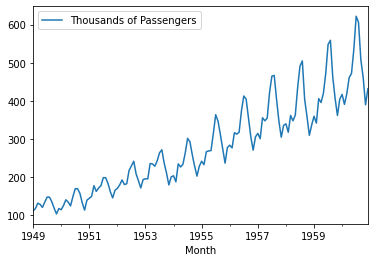

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060472
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700056
p- value: 0.054213290283824704
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468495
p- value: 2.7328918500143186e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
### 12 months as this is a seasonal data
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [23]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

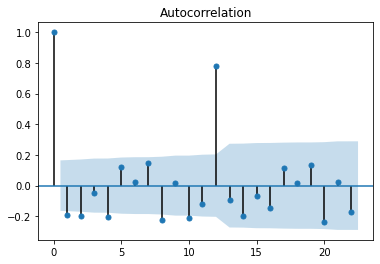

In [25]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())                                 #q=12

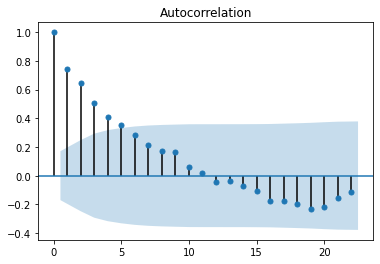

In [26]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())                           #q=5

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


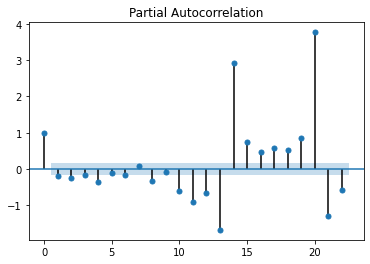

In [27]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

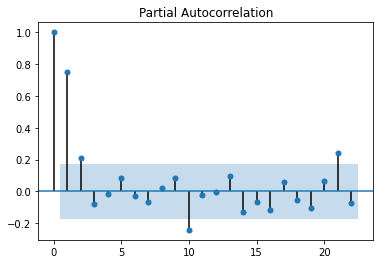

In [28]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())                  ##  p=2 or p=10     

In [29]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [30]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [33]:
train_dataset_end+timedelta(days=1)

datetime.datetime(1955, 12, 2, 0, 0)

In [31]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [34]:
test_data.index

DatetimeIndex(['1956-01-01', '1956-02-01', '1956-03-01', '1956-04-01',
               '1956-05-01', '1956-06-01', '1956-07-01', '1956-08-01',
               '1956-09-01', '1956-10-01', '1956-11-01', '1956-12-01',
               '1957-01-01', '1957-02-01', '1957-03-01', '1957-04-01',
               '1957-05-01', '1957-06-01', '1957-07-01', '1957-08-01',
               '1957-09-01', '1957-10-01', '1957-11-01', '1957-12-01',
               '1958-01-01', '1958-02-01', '1958-03-01', '1958-04-01',
               '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01',
               '1958-09-01', '1958-10-01', '1958-11-01', '1958-12-01',
               '1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01', '1959-11-01', '1959-12-01',
               '1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
      

In [35]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [36]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [37]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [38]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [40]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(2,2,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [41]:
model_Arima_fit=model_ARIMA.fit()

In [42]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(2, 2, 1)   Log Likelihood                -365.885
Method:                               css-mle   S.D. of innovations             20.406
Date:                        Sat, 20 Aug 2022   AIC                            741.771
Time:                                14:12:33   BIC                            753.805
Sample:                            03-01-1949   HQIC                           746.602
                                 - 12-01-1955                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0080      0.099      0.081      0.935      -0.186       0.202
ar.L1.D2.Thousands of Passengers     0.2754      0.111      2.477      0.013       0.058       0.493
ar.L2.D2.Thousands of Passengers    -0.2261      0.113     -2.008      0.045      -0.447      -0.005
ma.L1.D2.Thousands of Passengers    -1.0000      0.031    -32.100      0.000      -1.061      -0.939
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6090           -2.0128j            2.1029           -0.2032
AR.2            0.6090           +2.0128j            2.1029            0.2032
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [43]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [44]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [45]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [46]:
pred

1956-01-01   -19.512772
1956-02-01   -23.005498
1956-03-01    -1.916690
1956-04-01     4.681999
1956-05-01     1.730716
1956-06-01    -0.574391
1956-07-01    -0.541945
1956-08-01    -0.011747
1956-09-01     0.126958
1956-10-01     0.045269
1956-11-01    -0.008598
1956-12-01    -0.004963
1957-01-01     0.008219
1957-02-01     0.011028
1957-03-01     0.008821
1957-04-01     0.007578
1957-05-01     0.007734
1957-06-01     0.008059
1957-07-01     0.008113
1957-08-01     0.008054
1957-09-01     0.008026
1957-10-01     0.008031
1957-11-01     0.008039
1957-12-01     0.008040
1958-01-01     0.008039
1958-02-01     0.008038
1958-03-01     0.008038
1958-04-01     0.008038
1958-05-01     0.008038
1958-06-01     0.008038
1958-07-01     0.008038
1958-08-01     0.008038
1958-09-01     0.008038
1958-10-01     0.008038
1958-11-01     0.008038
1958-12-01     0.008038
1959-01-01     0.008038
1959-02-01     0.008038
1959-03-01     0.008038
1959-04-01     0.008038
1959-05-01     0.008038
1959-06-01     0

In [47]:
residuals

Month
1956-01-01    303.512772
1956-02-01    300.005498
1956-03-01    318.916690
1956-04-01    308.318001
1956-05-01    316.269284
1956-06-01    374.574391
1956-07-01    413.541945
1956-08-01    405.011747
1956-09-01    354.873042
1956-10-01    305.954731
1956-11-01    271.008598
1956-12-01    306.004963
1957-01-01    314.991781
1957-02-01    300.988972
1957-03-01    355.991179
1957-04-01    347.992422
1957-05-01    354.992266
1957-06-01    421.991941
1957-07-01    464.991887
1957-08-01    466.991946
1957-09-01    403.991974
1957-10-01    346.991969
1957-11-01    304.991961
1957-12-01    335.991960
1958-01-01    339.991961
1958-02-01    317.991962
1958-03-01    361.991962
1958-04-01    347.991962
1958-05-01    362.991962
1958-06-01    434.991962
1958-07-01    490.991962
1958-08-01    504.991962
1958-09-01    403.991962
1958-10-01    358.991962
1958-11-01    309.991962
1958-12-01    336.991962
1959-01-01    359.991962
1959-02-01    341.991962
1959-03-01    405.991962
1959-04-01    395.9

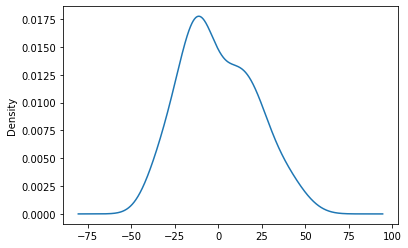

In [48]:
model_Arima_fit.resid.plot(kind='kde')

In [49]:
test_data['Predicted_ARIMA']=pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


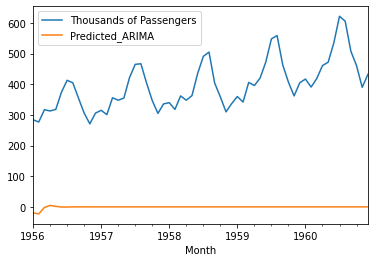

In [50]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

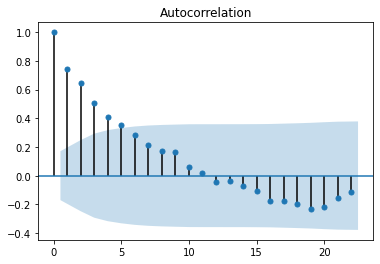

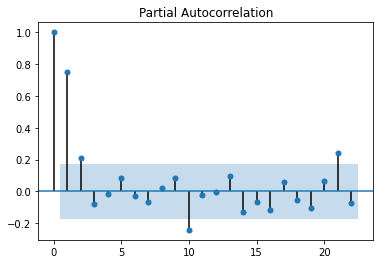

In [51]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [52]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [54]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(2,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [55]:
model_SARIMA_fit=model_SARIMA.fit()

In [56]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(2, 0, 5)x(0, 1, [], 12)   Log Likelihood                -266.318
Date:                             Sat, 20 Aug 2022   AIC                            548.636
Time:                                     14:14:31   BIC                            566.850
Sample:                                 01-01-1949   HQIC                           555.887
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3148      1.446      0.909      0.363      -1.520       4.150
ar.L2         -0.3310      1.423     -0.233      0.816      -3.120       2.458
ma.L1         -0.5814      1.435     -0.405      0.685      -3.394       2.231
ma.L2          0.1519      0.425      0.358      0.721      -0.681       0.985
ma.L3         -0.2934      0.221     -1.325      0.185      -0.727       0.141
ma.L4          0.1245      0.411      0.303      0.762      -0.681       0.930
ma.L5          0.0729      0.174      0.420      0.675      -0.268       0.413
sigma2        92.0983     17.257      5.337      0.000      58.274     125.922
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.87   Prob(JB):                         0.28
Heteroskedasticity (H):               2.13   Skew:                             0.45
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,0.008038
1960-09-01,508.0,-98.0,-82.0,45.0,0.008038
1960-10-01,461.0,-47.0,51.0,54.0,0.008038
1960-11-01,390.0,-71.0,-24.0,28.0,0.008038
1960-12-01,432.0,42.0,113.0,27.0,0.008038


In [58]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [59]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


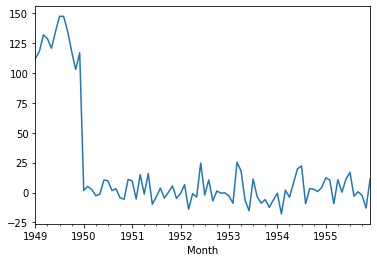

In [60]:
model_SARIMA_fit.resid.plot()

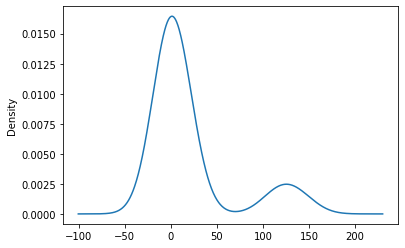

In [61]:
model_SARIMA_fit.resid.plot(kind='kde')

In [62]:
test_data['Predicted_SARIMA']=pred_Sarima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-19.512772,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,-23.005498,NaN
1956-03-01,317.0,40.0,47.0,50.0,-1.916690,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,4.681999,NaN
1956-05-01,318.0,5.0,9.0,48.0,1.730716,NaN
1956-06-01,374.0,56.0,51.0,59.0,-0.574391,NaN
1956-07-01,413.0,39.0,-17.0,49.0,-0.541945,403.530948
1956-08-01,405.0,-8.0,-47.0,58.0,-0.011747,385.579344
1956-09-01,355.0,-50.0,-42.0,43.0,0.126958,349.636468


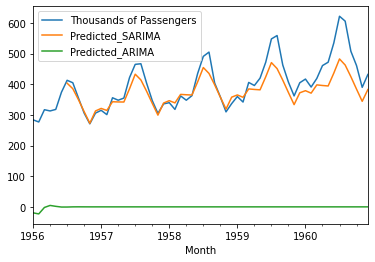

In [64]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()